# Facebook Insights

This is an assignment for PRO 316 - Social Media Data Analytics at Academy of Art University. A sample raw data of Facebook Insights are provided with questions to answered.

The dataset provided, which are excel files with multiple tabs, have been restructured, aggregated and reformatted to csv files for ease of use. For this homework, I will only be focusing on the Key Metrics provided on the data sets which are lifetime metrics

Importing libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Post Metrics
For the following questions, I would be using the Post Key Metrics.

* What type of content (videos, photos, etc.) seems to be performing the best on Facebook? How much better than other types of content?
* What kind of content doesn't seem to perform well on Facebook? Back up your claim with numbers.

Loading, Cleaning and Exploring the data

In [23]:
post_data = pd.read_csv("data/POST Key Metrics.csv")
post_data.head()

,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Post Paid Impressions,Lifetime Engaged Users,Lifetime Post Consumers,...,Lifetime Organic watches at 95%,Lifetime Organic watches at 95%.1,Lifetime Paid watches at 95%,Lifetime Paid watches at 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Paid Video Views,Lifetime Paid Video Views.1,Lifetime Average time video viewed,Lifetime Video length
0,Link,2/28/17 2:30 PM,939.0,939,0.0,1646.0,1646,0.0,13.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,Photo,2/28/17 12:02 PM,854.0,854,0.0,1397.0,1397,0.0,41.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,Photo,2/27/17 9:17 AM,2063.0,2063,0.0,3140.0,3140,0.0,97.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,Status,2/23/17 11:12 AM,9.0,9,0.0,16.0,16,0.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Status,2/23/17 11:07 AM,0.0,0,0.0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


Counting the number of posts per type

In [24]:
type_count = post_data.groupby('Type')['Posted'].nunique()

Text(0.5, 1.0, 'Number of Posts per Type')

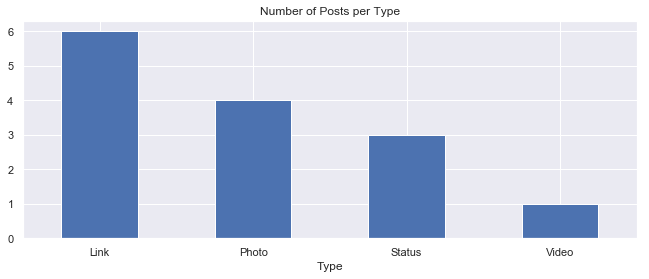

In [25]:
type_count.plot.bar(rot = 0)
plt.title('Number of Posts per Type')

From the chart, Link is the most used Post Type while there is only one Video post.

Since there is only one video post, I'll drop the columns that pertains to video metrics. These are also listed as NaN on the rows that are non-video posts.

In [26]:
post_data = post_data.drop(post_data.columns[18:], axis=1)
post_data.head()

,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Post Paid Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Negative feedback,Lifetime Negative Feedback from Users,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime Post Paid Impressions by people who have liked your Page,Lifetime Paid reach of a post by people who like your Page,Lifetime People who have liked your Page and engaged with your post
0,Link,2/28/17 2:30 PM,939.0,939,0.0,1646.0,1646,0.0,13.0,8.0,8.0,0.0,0.0,1576.0,901.0,0.0,0.0,13.0
1,Photo,2/28/17 12:02 PM,854.0,854,0.0,1397.0,1397,0.0,41.0,23.0,34.0,0.0,0.0,1152.0,679.0,0.0,0.0,36.0
2,Photo,2/27/17 9:17 AM,2063.0,2063,0.0,3140.0,3140,0.0,97.0,46.0,54.0,1.0,1.0,2106.0,1358.0,0.0,0.0,74.0
3,Status,2/23/17 11:12 AM,9.0,9,0.0,16.0,16,0.0,2.0,2.0,2.0,0.0,0.0,16.0,9.0,0.0,0.0,2.0
4,Status,2/23/17 11:07 AM,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Lifetime Post Total Reach of Each Post')

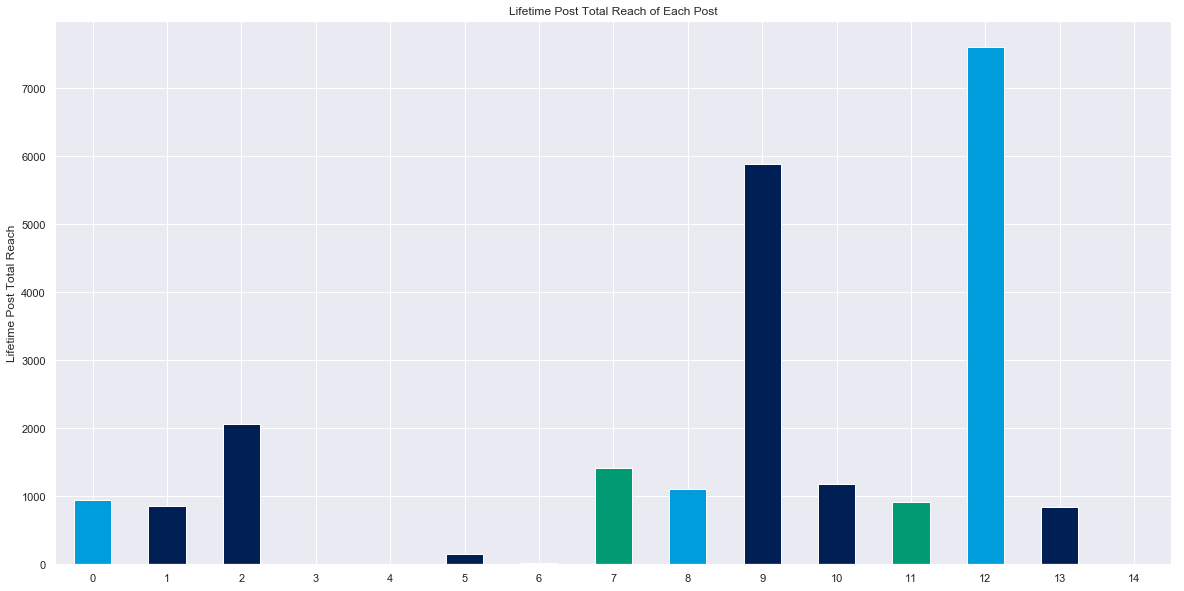

In [27]:
types = ['Link', 'Photo', 'Status', 'Video']
colors = ['#009ddc', '#001f54','#001f54', '#009b72']
typecolor = dict(zip(types, colors))

ax = post_data.plot(kind='bar', y='Lifetime Post Total Reach'
                    ,color = ['#009ddc', '#001f54','#001f54', '#009b72']
                    ,figsize=(20,10)
                    ,legend=False
                    ,rot=0)

plt.ylabel("Lifetime Post Total Reach")
plt.title("Lifetime Post Total Reach of Each Post")

#### Taking the average Post Total Reach by Type

Taking the average of the metrics per type of post will eliminate the bias of simply taking the total of the numbers per type of post.

Text(0.5, 1.0, 'Average Lifetime Post Total Reach by Type')

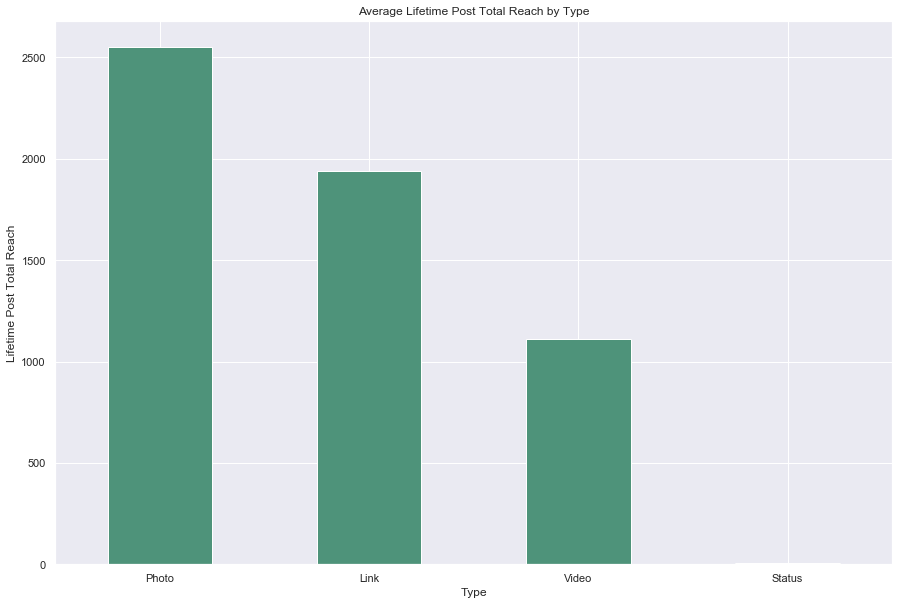

In [28]:
ave_totalreach = post_data.groupby(['Type'])['Lifetime Post Total Reach'].agg(['mean'])
ave_totalreach = ave_totalreach.sort_values(by='mean', ascending=False)
ave_totalreach.plot(kind='bar', figsize=(15,10), legend=False, color = '#4e937a', rot=0)

plt.ylabel('Lifetime Post Total Reach')
plt.title("Average Lifetime Post Total Reach by Type")

From this chart, we can see that Photos have the highest average reach despite Links the mostly shared type. Let's look at the averages of the other metrics

In [29]:
ave_impressions = post_data.groupby(['Type'])['Lifetime Post Total Impressions'].agg(['mean'])
ave_impressions = ave_impressions.sort_values(by='mean', ascending=False)

engaged_users = post_data.groupby(['Type'])['Lifetime Engaged Users'].agg(['mean'])
engaged_users = engaged_users.sort_values(by='mean', ascending=False)

reach_fan = post_data.groupby(['Type'])['Lifetime Post reach by people who like your Page'].agg(['mean'])
reach_fan = reach_fan.sort_values(by='mean', ascending=False)

fan_engage = post_data.groupby(['Type'])['Lifetime People who have liked your Page and engaged with your post'].agg(['mean'])
fan_engage = fan_engage.sort_values(by='mean', ascending=False)


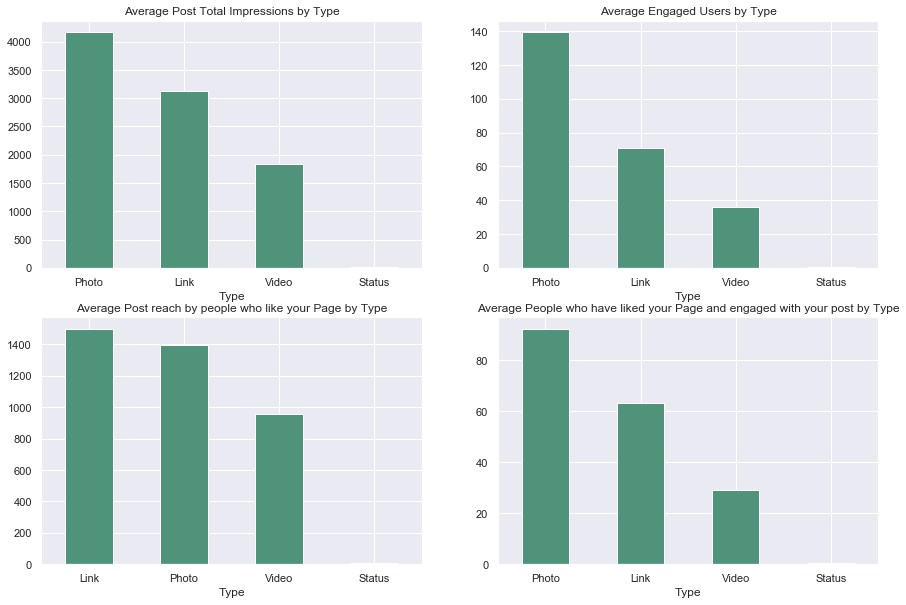

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2)

ave_impressions.plot(kind='bar', 
                     figsize=(15,10), 
                     legend=False, 
                     color = '#4e937a', 
                     rot=0, 
                     ax=axes[0,0], 
                     title='Average Post Total Impressions by Type')

engaged_users.plot(kind='bar', 
                   figsize=(15,10), 
                   legend=False, 
                   color = '#4e937a', 
                   rot=0, 
                   ax=axes[0,1], 
                   title='Average Engaged Users by Type')

reach_fan.plot(kind='bar', 
               figsize=(15,10), 
               legend=False, 
               color = '#4e937a', 
               rot=0, 
               ax=axes[1,0], 
               title='Average Post reach by people who like your Page by Type')

fan_engage.plot(kind='bar', 
                figsize=(15,10), 
                legend=False, 
                color = '#4e937a', 
                rot=0, 
                ax=axes[1,1], 
                title='Average People who have liked your Page and engaged with your post by Type')


Looking at the following charts, we can answer the questions. Photos seem to be performing the best on Facebook as they have the highest average impressions, reach and engagements. Links and Photos roughly have a similar post reach by people who likes the Facebook page. Status updates doesn't seem to perform well based on the charts even if they have almost the same number of posts as Photos.

### Page Metrics
For the following question, I would be using the Page Key Metrics for 02/2016 and 02/2017.

* What do this year's numbers look like compared to last year's?

In [31]:
# Loading the data
page_data = pd.read_csv('data/PAGE Key Metrics.csv')
page_data.head()

,Date,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,...,page_call_phone_clicks_logged_in_unique:day,page_call_phone_clicks_logged_in_unique:week,page_website_clicks_logged_in_count:day,page_website_clicks_logged_in_count:week,page_website_clicks_logged_in_unique:day,page_website_clicks_logged_in_unique:week,page_cta_clicks_logged_in_total:day,page_cta_clicks_logged_in_total:week,page_cta_clicks_logged_in_unique:day,page_cta_clicks_logged_in_unique:week
0,2/1/16,14061,5,4,33,88,943,689,1041,10094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/2/16,14066,7,1,12,86,909,329,1261,9870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2/3/16,14067,3,2,33,104,907,398,1532,9819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2/4/16,14069,6,3,11,107,908,107,1567,9781,...,0.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
4,2/5/16,14067,2,3,6,99,904,47,1580,9757,...,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0


Since this is time series data, line charts would be a good way to visualize the data.

In [32]:
# Converting the date fo a datetime object
page_data['Date'] = pd.to_datetime(page_data['Date'], format='%m/%d/%y')

# Setting date as data frame index 
page_data.set_index('Date', inplace=True)

In [33]:
page_data.head()

,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,Daily Organic Reach,...,page_call_phone_clicks_logged_in_unique:day,page_call_phone_clicks_logged_in_unique:week,page_website_clicks_logged_in_count:day,page_website_clicks_logged_in_count:week,page_website_clicks_logged_in_unique:day,page_website_clicks_logged_in_unique:week,page_cta_clicks_logged_in_total:day,page_cta_clicks_logged_in_total:week,page_cta_clicks_logged_in_unique:day,page_cta_clicks_logged_in_unique:week
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-01,14061,5,4,33,88,943,689,1041,10094,689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-02,14066,7,1,12,86,909,329,1261,9870,329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-03,14067,3,2,33,104,907,398,1532,9819,398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-04,14069,6,3,11,107,908,107,1567,9781,107,...,0.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
2016-02-05,14067,2,3,6,99,904,47,1580,9757,47,...,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0


In [34]:
page_data['Year'] = page_data.index.year
page_data['Month'] = page_data.index.month
page_data['Day'] = page_data.index.day

In [35]:
sns.set(rc={'figure.figsize': (11,4)})

In [36]:
new_df = page_data[['Year', 'Month', 'Day', 'Lifetime Total Likes', 'Daily New Likes', 'Daily Unlikes', 'Daily Page Engaged Users',
                   'Daily Total Reach', 'Daily Logged-in Page Views']].reset_index()
new_df.head()

,Date,Year,Month,Day,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Daily Total Reach,Daily Logged-in Page Views
0,2016-02-01,2016,2,1,14061,5,4,33,689,28
1,2016-02-02,2016,2,2,14066,7,1,12,329,16
2,2016-02-03,2016,2,3,14067,3,2,33,398,37
3,2016-02-04,2016,2,4,14069,6,3,11,107,24
4,2016-02-05,2016,2,5,14067,2,3,6,47,6


Text(0.5, 1.0, 'Lifetime Total Likes on February')

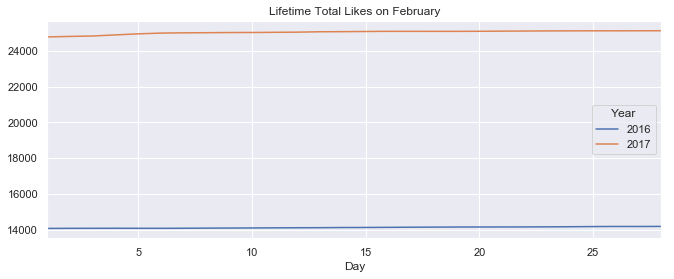

In [37]:
total_likes = new_df.pivot(index='Day',columns='Year',values='Lifetime Total Likes')
total_likes.plot()
plt.title('Lifetime Total Likes on February')

Looking at this time series plot, there is a huge difference in the Total likes between February 2016 and February 2017 as is almost doubled after a year. Let's look at some more comparisons between the years.

Text(0.5, 1.0, 'Daily New Likes on February')

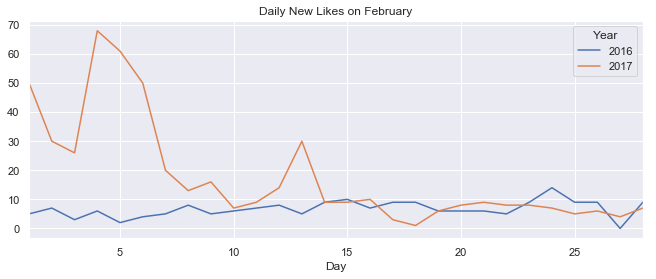

In [38]:
daily_likes = new_df.pivot(index='Day',columns='Year',values='Daily New Likes')
daily_likes.plot()
plt.title('Daily New Likes on February')

There seems to be a spike at the beginning and middle of the month in new likes in 2017 but it seems to normalize later in the month where 2016 was mostly constant. Let's look at more metrics

Text(0.5, 1.0, 'Daily Page Engaged Users on February')

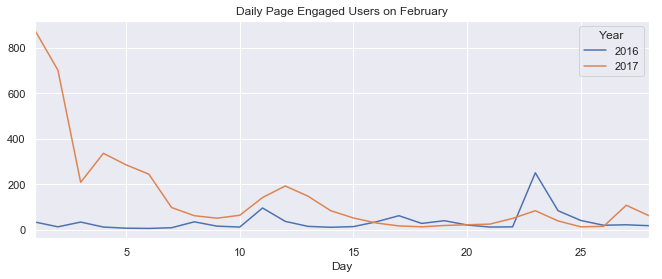

In [39]:
daily_engaged_users = new_df.pivot(index='Day',columns='Year',values='Daily Page Engaged Users')
daily_engaged_users.plot()
plt.title('Daily Page Engaged Users on February')

Text(0.5, 1.0, 'Daily Total Reach on February')

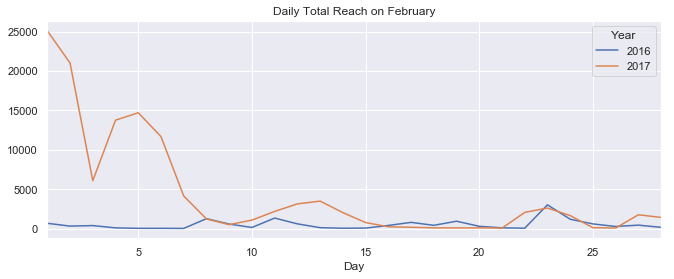

In [40]:
daily_reach = new_df.pivot(index='Day',columns='Year',values='Daily Total Reach')
daily_reach.plot()
plt.title('Daily Total Reach on February')

Text(0.5, 1.0, 'Daily Logged-in Page Views on February')

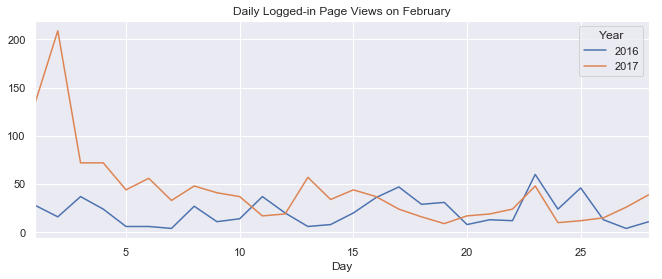

In [41]:
daily_views = new_df.pivot(index='Day',columns='Year',values='Daily Logged-in Page Views')
daily_views.plot()
plt.title('Daily Logged-in Page Views on February')

The rest of the charts exhibits the same trend as the Daily New Likes. I cross-checked with the Post insights, assuming it's from the same Facebook page, and I can't pinpoint why there was a spike since the posts are roughly evenly spaced out in terms of time of posting. There might have been an event related to this spike since the rest the month seems to play around the same numbers in both years.

Looking at the Lifetime Total Likes just by itself, I would say that 2017 is much higher than 2016 but I don't have enough historical data to make a solid conclusion especially when I saw that the other numbers doesn't show much difference other than that spike at the beginning of the month in 2017. Yes, the accumulated likes is almost twice as the past year but I would measure the progress better the full year data is available to me.

For the last question:

* What would you recommend "top level" for channel improvement based on numbers alone? 

Since we saw that Photos have a higher average engagement compared to Links which are the mostly posted type, I think we should focus more on posting Photos compared to Links. We could lessen Status posts unless really necessary. We should then measure the page metrics and see how it correlates to the metrics of the Photo posts.
